In [1]:
%pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149876 sha256=e4af01c9aa2f96d26c00d0f5e6a0b705d3ba8151e4ce9bfd714615f8ae5649f7
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
import pickle
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Dense, Bidirectional, Dropout, LSTM
from tensorflow.keras import Model
from tensorflow.keras.backend import ctc_decode
import Levenshtein as lev
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

with open('./drive/MyDrive/imgtensor_sh.pkl','rb') as arrbee:
    img_tensor_sh = pickle.load(arrbee)
    
with open('./labeltensor_shpad.pkl','rb') as ry:
    lab_tensor_sh = pickle.load(ry)
    



    
charlist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .,-+1234567890'


def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


def decode_preds(pred_model,start,end):
    #preds = pred_model.predict(img_tensor_trsh[start:end])
    preds = pred_model
    len_tensor = tf.convert_to_tensor([len([l for l in lab if l>0]) for lab in lab_tensor_sh[start:end]])
    pred_texts = ctc_decode(preds,len_tensor,greedy=True)
    guess_list =  [''.join([charlist[p-1] for p in pred.numpy() if p > -1]) for pred in pred_texts[0][0]]
    prob_list = pred_texts[1].numpy()
    return guess_list,prob_list

def post_distance(pred_model,start,end):
    preds, _ = decode_preds(pred_model,start,end)
    trues = [''.join([charlist[p-1] for p in lab.numpy() if p>0]) for lab in lab_tensor_sh[start:end]]
    return np.mean([lev.distance(trues[i],preds[i]) for i in range(end-start)])

Mounted at /content/drive


In [ ]:

!unzip fm2.zip -d ./firstmodel2/    
model2 = tf.keras.models.load_model('./firstmodel2/first_model_200', custom_objects={'CTCLoss':CTCLoss})

Archive:  fm2.zip
   creating: ./firstmodel2/first_model_200/
  inflating: ./firstmodel2/first_model_200/saved_model.pb  
  inflating: ./firstmodel2/first_model_200/keras_metadata.pb  
   creating: ./firstmodel2/first_model_200/assets/
   creating: ./firstmodel2/first_model_200/variables/
  inflating: ./firstmodel2/first_model_200/variables/variables.data-00000-of-00001  
  inflating: ./firstmodel2/first_model_200/variables/variables.index  


In [ ]:
model2.summary()

Model: "basic-OCR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 480, 679, 1)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 478, 677, 32)      320       
                                                                 
 pool1 (MaxPooling2D)        (None, 239, 338, 32)      0         
                                                                 
 Conv2 (Conv2D)              (None, 237, 336, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 118, 168, 64)      0         
                                                                 
 reshape (Reshape)           (None, 118, 10752)        0         
                                                                 
 dense1 (Dense)              (None, 118, 64)           68

In [ ]:
eps = 100

hist2 = model2.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps)

Epoch 1/100
36/36 [==============================] - 38s 387ms/step - loss: 14.3822 - val_loss: 30.6890
Epoch 2/100
36/36 [==============================] - 11s 301ms/step - loss: 14.2383 - val_loss: 30.3594
Epoch 3/100
36/36 [==============================] - 11s 303ms/step - loss: 14.1030 - val_loss: 29.6234
Epoch 4/100
36/36 [==============================] - 11s 303ms/step - loss: 14.1616 - val_loss: 32.1473
Epoch 5/100
36/36 [==============================] - 11s 306ms/step - loss: 14.8584 - val_loss: 30.7090
Epoch 6/100
36/36 [==============================] - 11s 306ms/step - loss: 14.1164 - val_loss: 30.9932
Epoch 7/100
36/36 [==============================] - 11s 305ms/step - loss: 13.9925 - val_loss: 29.8369
Epoch 8/100
36/36 [==============================] - 11s 308ms/step - loss: 13.8758 - val_loss: 30.9631
Epoch 9/100
36/36 [==============================] - 11s 308ms/step - loss: 13.9539 - val_loss: 31.2149
Epoch 10/100
36/36 [==============================] - 11s 306ms/

In [ ]:
pred_model = model2.predict(img_tensor_sh)
guesses,preds = decode_preds(pred_model,0,1407)

trues = trues = [''.join([charlist[p-1] for p in  lab.numpy() if p>0]) for lab in lab_tensor_sh[:1407]]

In [ ]:
post_distance(pred_model,0,1407)

5.0106609808102345

In [ ]:
trues[1200:1220]

['Neg',
 '---, Margaret E',
 'F',
 'H',
 'Clark Samuel',
 '15',
 'Claydon, Darlene',
 'Hubbard Charles',
 'F',
 'issanette, Stella',
 '20',
 'Neg',
 'used Car Lot',
 '22',
 '---, Myrtle L.',
 'Son',
 '49',
 '28',
 'neg',
 'No one at home']

In [ ]:
np.mean([lev.distance(trues[i],guesses[i]) for i in range(1200,1407)])

6.657004830917875

In [ ]:
np.mean([lev.distance(trues[i],guesses[i]) for i in range(1200)])

4.726666666666667

In [ ]:
i = 1

input_img = Input(shape=(480,679,1),name='image'+ str(i),dtype="float32")
#labels = Input(shape=(None,),name='label',dtype="int32") #we're using ragged tensors, so no set shape

x = Conv2D(32,(3,3),activation='relu',name='Conv1'+ str(i))(input_img)
x = MaxPooling2D((2,2), name = "pool1"+ str(i))(x)

x = Conv2D(64,(3,3),activation='relu',name='Conv2'+ str(i))(x)
x = MaxPooling2D((2,2), name = "pool2"+ str(i))(x)

shape = ((480//4)-2,((679//4)-1)*64)

x = Reshape(target_shape=shape, name = 'reshape'+ str(i))(x)
x = Dense(64, activation='relu', name ='dense1'+ str(i))(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu', name= 'dense1.5'+ str(i))(x)
x = Dropout(0.2)(x)

x = Bidirectional(LSTM(256,return_sequences=True,dropout=0.25),name='L0'+ str(i))(x)
x = Bidirectional(LSTM(128,return_sequences=True, dropout=0.25),name = "L"+ str(i))(x)
x = Bidirectional(LSTM(64,return_sequences=True,dropout=0.25), name = "L2"+ str(i))(x)


#x = Dense(len(charlist)+2,activation='softmax',name='dense2')(x)
output = Dense(len(charlist)+2,activation='softmax',name='dense2'+ str(i))(x)
#output = CTCLayer(name='ctc_loss')(labels,x)

model3 = Model(input_img,output,name='basic-OCR'+ str(i))
model3.compile(optimizer='adam',loss=CTCLoss)

In [ ]:
model3.summary()

Model: "basic-OCR1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image1 (InputLayer)         [(None, 480, 679, 1)]     0         
                                                                 
 Conv11 (Conv2D)             (None, 478, 677, 32)      320       
                                                                 
 pool11 (MaxPooling2D)       (None, 239, 338, 32)      0         
                                                                 
 Conv21 (Conv2D)             (None, 237, 336, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 118, 168, 64)      0         
                                                                 
 reshape1 (Reshape)          (None, 118, 10752)        0         
                                                                 
 dense11 (Dense)             (None, 118, 64)           6

In [ ]:
eps = 100

hist2 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps)

Epoch 1/100
36/36 [==============================] - 22s 398ms/step - loss: 82.3647 - val_loss: 54.6873
Epoch 2/100
36/36 [==============================] - 12s 337ms/step - loss: 44.8283 - val_loss: 51.6825
Epoch 3/100
36/36 [==============================] - 12s 333ms/step - loss: 40.7451 - val_loss: 44.1189
Epoch 4/100
36/36 [==============================] - 12s 332ms/step - loss: 38.8643 - val_loss: 48.4668
Epoch 5/100
36/36 [==============================] - 12s 331ms/step - loss: 39.3185 - val_loss: 42.4371
Epoch 6/100
36/36 [==============================] - 12s 329ms/step - loss: 38.2517 - val_loss: 42.4162
Epoch 7/100
36/36 [==============================] - 12s 333ms/step - loss: 37.2865 - val_loss: 43.5344
Epoch 8/100
36/36 [==============================] - 12s 337ms/step - loss: 38.2003 - val_loss: 45.6687
Epoch 9/100
36/36 [==============================] - 12s 337ms/step - loss: 35.4211 - val_loss: 40.4042
Epoch 10/100
36/36 [==============================] - 12s 334ms/

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=15, restore_best_weights=True
)
pred_model3 = model3.predict(img_tensor_sh)
guesses3,preds3 = decode_preds(pred_model3,0,1407)

In [ ]:
post_distance(pred_model3,0,1407)

6.895522388059701

In [ ]:
np.mean([lev.distance(trues[i],guesses3[i]) for i in range(1200,1407)])

7.811594202898551

In [ ]:
np.mean([lev.distance(trues[i],guesses3[i]) for i in range(1200)])

6.7375

In [ ]:
hist3 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps, callbacks=[early_stopping])

Epoch 1/100
36/36 [==============================] - 12s 343ms/step - loss: 22.8414 - val_loss: 27.4790
Epoch 2/100
36/36 [==============================] - 12s 330ms/step - loss: 24.5225 - val_loss: 31.0970
Epoch 3/100
36/36 [==============================] - 12s 330ms/step - loss: 23.0252 - val_loss: 28.3510
Epoch 4/100
36/36 [==============================] - 12s 334ms/step - loss: 22.5309 - val_loss: 29.0761
Epoch 5/100
36/36 [==============================] - 12s 328ms/step - loss: 22.6962 - val_loss: 28.2917
Epoch 6/100
36/36 [==============================] - 12s 325ms/step - loss: 22.2733 - val_loss: 27.7436
Epoch 7/100
36/36 [==============================] - 12s 327ms/step - loss: 22.0772 - val_loss: 28.1288
Epoch 8/100
36/36 [==============================] - 12s 327ms/step - loss: 21.8603 - val_loss: 27.4267
Epoch 9/100
36/36 [==============================] - 12s 329ms/step - loss: 21.9325 - val_loss: 26.9425
Epoch 10/100
36/36 [==============================] - 12s 327ms/

In [ ]:
pred_model35 = model3.predict(img_tensor_sh)
guesses35,preds35 = decode_preds(pred_model35,0,1407)

In [ ]:
np.mean([lev.distance(trues[i],guesses35[i]) for i in range(1200,1407)])

7.048309178743962

In [ ]:
np.mean([lev.distance(trues[i],guesses35[i]) for i in range(1200)])

6.008333333333334

In [ ]:
model3.save('./ocr1-124')

INFO:tensorflow:Assets written to: ./ocr1-124/assets


INFO:tensorflow:Assets written to: ./ocr1-124/assets


In [ ]:
!zip -r ./ocr1-124.zip ./ocr1-124/

  adding: ocr1-124/ (stored 0%)
  adding: ocr1-124/saved_model.pb (deflated 90%)
  adding: ocr1-124/keras_metadata.pb (deflated 94%)
  adding: ocr1-124/assets/ (stored 0%)
  adding: ocr1-124/variables/ (stored 0%)
  adding: ocr1-124/variables/variables.index (deflated 72%)
  adding: ocr1-124/variables/variables.data-00000-of-00001 (deflated 13%)


In [ ]:
hist4 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps)

Epoch 1/100
36/36 [==============================] - 12s 339ms/step - loss: 21.6886 - val_loss: 27.3735
Epoch 2/100
36/36 [==============================] - 12s 332ms/step - loss: 21.6493 - val_loss: 27.2732
Epoch 3/100
36/36 [==============================] - 12s 332ms/step - loss: 21.6013 - val_loss: 28.0490
Epoch 4/100
36/36 [==============================] - 12s 326ms/step - loss: 21.6768 - val_loss: 33.3365
Epoch 5/100
36/36 [==============================] - 12s 327ms/step - loss: 22.9026 - val_loss: 28.3286
Epoch 6/100
36/36 [==============================] - 12s 324ms/step - loss: 21.7186 - val_loss: 27.6061
Epoch 7/100
36/36 [==============================] - 12s 326ms/step - loss: 21.6148 - val_loss: 28.1258
Epoch 8/100
36/36 [==============================] - 12s 329ms/step - loss: 21.4371 - val_loss: 27.2399
Epoch 9/100
36/36 [==============================] - 12s 327ms/step - loss: 21.2614 - val_loss: 27.4457
Epoch 10/100
36/36 [==============================] - 12s 329ms/

In [ ]:
pred_model351 = model3.predict(img_tensor_sh)
guesses351,preds351 = decode_preds(pred_model351,0,1407)
np.mean([lev.distance(trues[i],guesses351[i]) for i in range(1200,1407)]),np.mean([lev.distance(trues[i],guesses351[i]) for i in range(1200)])

(7.043478260869565, 5.885833333333333)

In [ ]:
hist5 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps)

Epoch 1/100
36/36 [==============================] - 12s 342ms/step - loss: 17.8440 - val_loss: 25.7528
Epoch 2/100
36/36 [==============================] - 12s 329ms/step - loss: 17.6451 - val_loss: 26.0465
Epoch 3/100
36/36 [==============================] - 12s 330ms/step - loss: 17.3201 - val_loss: 25.9120
Epoch 4/100
36/36 [==============================] - 12s 328ms/step - loss: 18.4907 - val_loss: 26.2339
Epoch 5/100
36/36 [==============================] - 12s 328ms/step - loss: 18.1745 - val_loss: 26.2535
Epoch 6/100
36/36 [==============================] - 12s 326ms/step - loss: 17.8177 - val_loss: 26.0311
Epoch 7/100
36/36 [==============================] - 12s 329ms/step - loss: 17.3600 - val_loss: 25.8219
Epoch 8/100
36/36 [==============================] - 12s 327ms/step - loss: 17.3162 - val_loss: 26.5347
Epoch 9/100
36/36 [==============================] - 12s 329ms/step - loss: 17.5324 - val_loss: 26.5941
Epoch 10/100
36/36 [==============================] - 12s 328ms/

In [ ]:
pred_model36 = model3.predict(img_tensor_sh)
guesses36,preds36 = decode_preds(pred_model36,0,1407)
np.mean([lev.distance(trues[i],guesses36[i]) for i in range(1200,1407)]),np.mean([lev.distance(trues[i],guesses36[i]) for i in range(1200)])

(6.434782608695652, 4.9775)

In [ ]:
model3.save('./ocr1-324')

INFO:tensorflow:Assets written to: ./ocr1-324/assets


INFO:tensorflow:Assets written to: ./ocr1-324/assets


In [ ]:
!zip -r ./ocr1-324.zip ./ocr1-324/


  adding: ocr1-324/ (stored 0%)
  adding: ocr1-324/saved_model.pb (deflated 90%)
  adding: ocr1-324/keras_metadata.pb (deflated 94%)
  adding: ocr1-324/assets/ (stored 0%)
  adding: ocr1-324/variables/ (stored 0%)
  adding: ocr1-324/variables/variables.index (deflated 72%)
  adding: ocr1-324/variables/variables.data-00000-of-00001 (deflated 12%)


In [ ]:
hist6 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=eps)

Epoch 1/100
36/36 [==============================] - 19s 391ms/step - loss: 14.6063 - val_loss: 28.1373
Epoch 2/100
36/36 [==============================] - 12s 323ms/step - loss: 14.5987 - val_loss: 28.1801
Epoch 3/100
36/36 [==============================] - 12s 328ms/step - loss: 14.2628 - val_loss: 27.7325
Epoch 4/100
36/36 [==============================] - 12s 333ms/step - loss: 14.3964 - val_loss: 27.5919
Epoch 5/100
36/36 [==============================] - 12s 330ms/step - loss: 14.6141 - val_loss: 28.9164
Epoch 6/100
36/36 [==============================] - 12s 330ms/step - loss: 14.8417 - val_loss: 27.7543
Epoch 7/100
36/36 [==============================] - 12s 326ms/step - loss: 14.3601 - val_loss: 28.3284
Epoch 8/100
36/36 [==============================] - 12s 325ms/step - loss: 14.2765 - val_loss: 27.9625
Epoch 9/100
36/36 [==============================] - 12s 332ms/step - loss: 14.2201 - val_loss: 28.8899
Epoch 10/100
36/36 [==============================] - 12s 328ms/

In [ ]:
pred_model37 = model3.predict(img_tensor_sh)
guesses37,preds37 = decode_preds(pred_model37,0,1407)
np.mean([lev.distance(trues[i],guesses37[i]) for i in range(1200,1407)]),np.mean([lev.distance(trues[i],guesses37[i]) for i in range(1200)])

(6.565217391304348, 4.640833333333333)

In [ ]:
model3.save('./ocr1-424')

INFO:tensorflow:Assets written to: ./ocr1-424/assets


INFO:tensorflow:Assets written to: ./ocr1-424/assets


In [ ]:
!zip -r ./ocr1-424.zip ./ocr1-424/

  adding: ocr1-424/ (stored 0%)
  adding: ocr1-424/saved_model.pb (deflated 90%)
  adding: ocr1-424/keras_metadata.pb (deflated 94%)
  adding: ocr1-424/assets/ (stored 0%)
  adding: ocr1-424/variables/ (stored 0%)
  adding: ocr1-424/variables/variables.index (deflated 72%)
  adding: ocr1-424/variables/variables.data-00000-of-00001 (deflated 13%)


In [ ]:
hist7 = model3.fit(img_tensor_sh,lab_tensor_sh,validation_split=0.2, epochs=2*eps)

Epoch 1/200
36/36 [==============================] - 12s 326ms/step - loss: 12.1356 - val_loss: 31.0475
Epoch 2/200
36/36 [==============================] - 11s 319ms/step - loss: 11.9727 - val_loss: 32.0401
Epoch 3/200
36/36 [==============================] - 12s 326ms/step - loss: 11.9439 - val_loss: 30.5289
Epoch 4/200
36/36 [==============================] - 11s 320ms/step - loss: 11.4916 - val_loss: 31.0345
Epoch 5/200
36/36 [==============================] - 12s 322ms/step - loss: 11.5428 - val_loss: 31.0714
Epoch 6/200
36/36 [==============================] - 12s 321ms/step - loss: 11.7257 - val_loss: 32.3180
Epoch 7/200
36/36 [==============================] - 12s 320ms/step - loss: 12.2604 - val_loss: 32.0707
Epoch 8/200
36/36 [==============================] - 12s 322ms/step - loss: 11.9061 - val_loss: 31.7012
Epoch 9/200
36/36 [==============================] - 12s 323ms/step - loss: 11.6805 - val_loss: 31.1249
Epoch 10/200
36/36 [==============================] - 12s 324ms/

In [ ]:
pred_model38 = model3.predict(img_tensor_sh)
guesses38,preds38 = decode_preds(pred_model38,0,1407)
np.mean([lev.distance(trues[i],guesses38[i]) for i in range(1200,1407)]),np.mean([lev.distance(trues[i],guesses38[i]) for i in range(1200)])

(7.091787439613527, 4.984166666666667)

In [ ]:
#funny, even the train set got worse despite super low 'loss'

In [4]:
!unzip fm2.zip 

Archive:  fm2.zip
   creating: first_model_200/
  inflating: first_model_200/saved_model.pb  
  inflating: first_model_200/keras_metadata.pb  
   creating: first_model_200/assets/
   creating: first_model_200/variables/
  inflating: first_model_200/variables/variables.data-00000-of-00001  
  inflating: first_model_200/variables/variables.index  


In [5]:
model2 = tf.keras.models.load_model('./first_model_200', custom_objects={'CTCLoss':CTCLoss})

In [6]:
pred_model = model2.predict(img_tensor_sh)
guesses,preds = decode_preds(pred_model,0,1407)

trues = trues = [''.join([charlist[p-1] for p in  lab.numpy() if p>0]) for lab in lab_tensor_sh[:1407]]

In [8]:
guesses[:20]

['Le',
 'Ne',
 '---, J',
 '36',
 'M',
 'Coe, J',
 '---, J',
 '---, ',
 'Ro ',
 'Pe Ma',
 'Co, M',
 'Alaba',
 'W',
 'Hea',
 'Co, Ja',
 '49',
 'M',
 'H',
 'No one ho',
 'Gr']

In [13]:
trues[:20]
import pandas as pd

In [16]:
a = pd.DataFrame(Counter(''.join(guesses)).most_common(), columns=['Character','Frequency']).head(10)

In [17]:
a.set_index('Character')

,Frequency
Character,
-,670
,605
a,515
o,401
e,368
",",215
M,178
i,159
C,156


In [18]:
!unzip fm.zip

Archive:  fm.zip
   creating: first_model_diff/
  inflating: first_model_diff/saved_model.pb  
  inflating: first_model_diff/keras_metadata.pb  
   creating: first_model_diff/assets/
   creating: first_model_diff/variables/
  inflating: first_model_diff/variables/variables.data-00000-of-00001  
  inflating: first_model_diff/variables/variables.index  


In [20]:
np.mean([lev.distance(trues[i],guesses[i]) for i in range(1126,1407)]),np.mean([lev.distance(trues[i],guesses[i]) for i in range(1126)])

(6.530249110320285, 4.9733570159857905)

In [21]:
model = tf.keras.models.load_model('./first_model_diff', custom_objects={'CTCLoss':CTCLoss})

In [22]:
p_model = model.predict(img_tensor_sh)
guesses2,preds2 = decode_preds(p_model,0,1407)


In [23]:
np.mean([lev.distance(trues[i],guesses2[i]) for i in range(1126,1407)]),np.mean([lev.distance(trues[i],guesses2[i]) for i in range(1126)])

(7.4911032028469755, 6.264653641207815)

In [24]:
!unzip ocr1-324.zip

Archive:  ocr1-324.zip
   creating: ocr1-324/
  inflating: ocr1-324/saved_model.pb  
  inflating: ocr1-324/keras_metadata.pb  
   creating: ocr1-324/assets/
   creating: ocr1-324/variables/
  inflating: ocr1-324/variables/variables.index  
  inflating: ocr1-324/variables/variables.data-00000-of-00001  


In [25]:

model3 = tf.keras.models.load_model('./ocr1-324',custom_objects={'CTCLoss':CTCLoss})
pmodel = model3.predict(img_tensor_sh)
guesses3,preds3 = decode_preds(pmodel,0,1407)
np.mean([lev.distance(trues[i],guesses3[i]) for i in range(1126,1407)]),np.mean([lev.distance(trues[i],guesses3[i]) for i in range(1126)])

(6.469750889679715, 4.873001776198934)

In [26]:
a = pd.DataFrame(Counter(''.join(guesses3)).most_common(), columns=['Character','Frequency']).head(10)

In [27]:
a.set_index('Character')

,Frequency
Character,
a,709
-,671
,567
M,350
o,336
",",323
e,293
n,280
l,189


In [31]:
b = pd.DataFrame(Counter(guesses3).most_common(),columns=['Text','Frequency'])

In [32]:
b.set_index('Text').head(10)

,Frequency
Text,
"---, Ma",90
Alab,69
F,59
M,51
Ne,45
Hea,43
Wif,33
"---, M",31
W,29


In [33]:
c = pd.DataFrame(Counter(trues).most_common(),columns=['Text','Frequency'])

In [34]:
c.set_index('Text').head(10)

,Frequency
Text,
Alabama,72
M,58
F,58
Neg,52
Head,43
Wife,34
W,28
Son,28
No one at home,21


In [35]:
a = [lev.distance(trues[i],guesses3[i]) for i in range(1407)]

(array([578., 204., 265., 188., 108.,  42.,  13.,   2.,   5.,   2.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

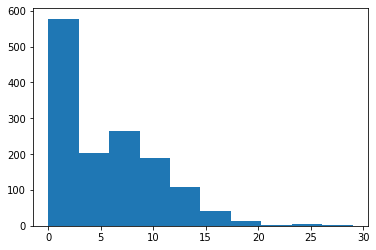

In [36]:
plt.hist(a)

In [37]:
import seaborn as sns

Text(0.5, 0, 'Levenshtein Distance')

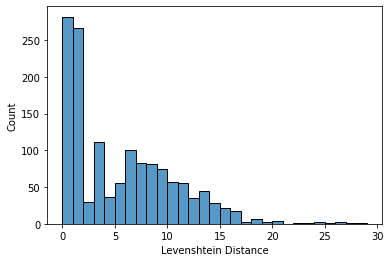

In [48]:
sns.histplot(a,binwidth=1)


plt.xlabel('Levenshtein Distance')

In [42]:
q = [len(max(trues[i],guesses3[i])) for i in range(1407)]

In [ ]:
plt.pie()

In [53]:
guesses3.index(max(guesses3, key = len))

471

In [56]:
trues[471], guesses3[471]

('Wholesale Clay manufacturing Co', 'Wholesale t ')